# Calculate the coupling efficiency between a laser diode and a waveguide in Python

The calculation of the coupling efficiency shown in this script is based on the information found [here](https://is.gd/XRjN6o). Modifications were made to the geometrical efficiency factor to allow calculations of the coupling efficiency when the laser diode and the waveguide are separated by some distance.

## 1. Import all the necessary packages 

The package "efficiency" containts the definitions of the classes (SquaredWaveguide, LaserDiode and Calculator) that are used in this script. The file "efficiency.py" should be in the same folder as this script in order to run.

In addition, the following python packages should be installed (dependencies):
- numpy
- matplotlib
- seaborn

Once this packages are installed, we import them into our script with the following commands

In [1]:
import efficiency as ef
import numpy as np
import numpy.random as rnd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import Ellipse

## 2. Create an instance/object of a waveguide with a square cross-section

We create an instance of the class SquaredWaveguide. This class allows to have a general definition of a waveguide with a squared cross-section, which depends on some inital parameters, like the indices of refractions of the core and cladding, and to automaticatically derive some values (e.g. the acceptance angle) once the initial parameters are introduced.

The inital parameters/attributes of the waveguide are:

**n_core **: _index of refraction of the waveguide's core._

**n_clad**: _index of refraction of the waveguide's cladding._

**core_thickness**: _thickness of the core layer. Units: um_

**clad_thickness**: _thickness of the cladding layer. Units: um_


We create an instance of a a waveguide with a square cross-section and store it in the variable waveguide1 with

```python
waveguide1 = efficiency.SquaredWaveguide(n_core, n_clad, core_thickness, clad_thickness)
```


In [2]:
# Here: a waveguide with core material AF32 glass (n=1.51) and cladding material SiO2 (n=1.465)
waveguide1 = ef.SquaredWaveguide(1.51, 1.465, 50, 1)  # with 50um thickness
waveguide2 = ef.SquaredWaveguide(1.51, 1.465, 30, 1)  # with 30um thickness

# make a list of the lasers so that we can iterate over them
waveguides = [waveguide1, waveguide2]
# select a waveguide
chosen_waveguide = waveguides[0]

Inspect the acceptance angle of the chosen waveguide

In [3]:
# calculate the acceptance angle and print the resulting  value
theta_deg = np.rad2deg(chosen_waveguide.theta)
print(f"Waveguide's acceptance angle: theta = {theta_deg} deg")

Waveguide's acceptance angle: theta = 21.46232368665197 deg


## 3. Create an instance of a laser diode

We create an instance of the class LaserDiode. Similarly to the case of the waveguide, this allows to have a general definition of the laser diode and to automatically calculate some properties of the laser once the intial attributes of the laser are defined.

The inital parameters/attributes of the laser diode are:

**lda**: _wavelength_.

**fwhm_slow**: _Full width at half maximum on the slow axis. Units: deg_

**fwhm_fast**: _Full width at half maximum on the fast axis. Units: deg_


We create an instance of a laser diode which is stored in the variable laser1 with

```python
laser1 = efficiency.LaserDiode(lda, fwhm_slow, fwhm_fast)
```

In [4]:
# Here: GNx blue laser diode
laser1 = ef.LaserDiode(405, 9, 26)
# CHIP-980-P50 infrared
laser2 = ef.LaserDiode(980, 13, 30)
# 650nm Red Laser Diode Chips for DVD
laser3 = ef.LaserDiode(655, 8, 28)
# communications laser 1550nm wavelength
laser4 = ef.LaserDiode(1550, 9, 28)

# make a list of the lasers so that we can iterate over them
lasers = [laser1, laser2, laser3, laser4]
# pick laser by index on the laser list
chosen_laser = lasers[2]

Inspect some of the derived parameters of the chosen laser diode, e.g. the power distribution coefficients L and T, and the parameters of the Gaussian beam for the slow axis.

In [5]:
print(f"Laser diode's power distribution coefficients: L = {chosen_laser.l_coefficient}"
      f"and T = {chosen_laser.t_coefficient}")

Laser diode's power distribution coefficients: L = 284.0and T = 22.0


In [6]:
# change half divergence units from radians to degrees
theta_slow = np.rad2deg(chosen_laser.theta_slow)
theta_fast = np.rad2deg(chosen_laser.theta_fast)
print(f"Laser diode's Gaussian beam parameters for the slow axis: half divervenge angle  theta_slow = {theta_slow}"
      f",theta_fast = {theta_fast}, minimum half width  w_0 = {chosen_laser.wo_slow} and Rayleigh range x_0 = {chosen_laser.xo_slow}")

Laser diode's Gaussian beam parameters for the slow axis: half divervenge angle  theta_slow = 6.794574402304153,theta_fast = 23.78101040806454, minimum half width  w_0 = 1.7581333052119668 and Rayleigh range x_0 = 14.825596460592305


## 4. Create and instance of the efficiency calculator 

That is, we bring together the information of the laser diode and the waveguide, so that the program can calculate the coupling efficiency

In [7]:
calc = ef.Calculator(chosen_waveguide, chosen_laser)

Before calculating the coupling efficiency we should select the separation distance x between the laser diode and the waveguide. If no distance is specified this value is set to zero by default. 

In [8]:
x = 5 # we calculate the efficiency for a separation distance of 5um

Now we calculate first the different efficiency factors separately, and then we calculate the total efficiency.

In [9]:
# calculate efficiency factors
n_geom = calc.geometrical_losses(x)
n_fresnel = calc.fresnel_losses()
n_angular = calc.angular_losses()
# calculate total efficiency
n_total = calc.total_efficiency(x)

Finally, we print these values to see the results.

In [10]:
# print the results
print(f"The geometrical factor for coupling efficiency is: {n_geom} for a separation of x = {x} um")
print(f"The Fresnel factor for coupling efficiency is: {n_fresnel}")
print(f"The angular factor for coupling efficiency is: {n_angular}")
print(f"The total coupling efficiency at x = {x} is: {n_total}")

The geometrical factor for coupling efficiency is: 1 for a separation of x = 5 um
The Fresnel factor for coupling efficiency is: 0.9587149410326821
The angular factor for coupling efficiency is: 0.8991643608531447
The total coupling efficiency at x = 5 is: 0.8620423071940119


## 5. Additional inspection of the laser parameters

Besides calculating the total efficiency, we would like to get an idea of the size of the light spot on the
input surface of the waveguide. 

To do that, we first calculate the beam half width at a distance x from the laser origin.

In [11]:
# calculate the values of the beam half width at a distance x and print the values
wo_s, wo_f = chosen_laser.calculate_beam_width(x)

We print the calculated values to see the results.

In [12]:
print(f"Laser diode spot size at x = {x}: {wo_s} um * {wo_f} um ")

Laser diode spot size at x = 5: 1.8554268381187373 um * 2.135213245160848 um 


Once we have this, we can plot the corresponding ellipse as follows:

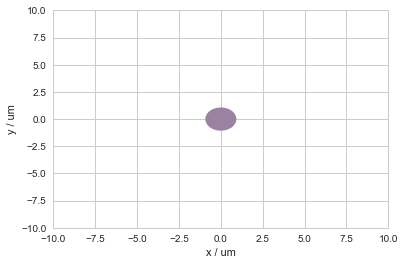

In [13]:
# activate seaborn plotting (nicer plots)
sns.set()
sns.set_style("whitegrid")

# plot the ellipse at the distance x to inspect the shape of the laser diode profile
plt.figure()
ax = plt.gca()
# ax.set_xlim([-wo_s, wo_s])
# ax.set_ylim([-wo_f, wo_f])
ax.set_xlim([-10, 10])
ax.set_ylim([-10, 10])
plt.xlabel('x / um')
plt.ylabel('y / um')

# ellipse = Ellipse(xy=(0, 0), width=wo_s, height=wo_f,
#                   edgecolor='b', fc='None', lw=2)
ellipse = Ellipse(xy=(0, 0), width=wo_s, height=wo_f,
                  fc='None')
ax.add_patch(ellipse)
ellipse.set_facecolor(rnd.rand(3))

plt.show()